In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import folium
from folium import plugins
from folium.plugins import HeatMap
import branca.colormap as cm
import seaborn as sns

In [2]:
df = pd.read_csv('lats_longs_ccmo.txt', header=None, index_col=False, names=['Name', 'Lat', 'Long', 'Info'] )
#df has 2311 rows

In [3]:
#split the information column into 3 columns
df['price'], df['bedrooms'], df['bathrooms'] = zip(*df['Info'].str.split().tolist())

In [4]:
#clean the three new columns
df['price'] = df['price'].apply(lambda x: int(x[2:]))

df['bedrooms'] = df['bedrooms'].apply(lambda x: int(x[:1]))

df['bathrooms'] = df['bathrooms'].apply(lambda x: float(x[:-3]))

In [5]:
# to get the four corners of my heatmap
min_lat = df['Lat'].min()
max_lat = df['Lat'].max()
min_long = df['Long'].min()
max_long = df['Long'].max()
min_lat, max_lat, min_long, max_long

(38.475970000000004,
 38.951271000000006,
 -94.60886500000001,
 -94.06871899999999)

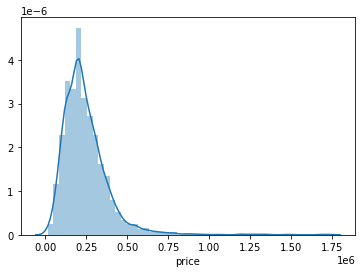

In [6]:
sns.distplot(df['price'])

In [8]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
df.describe()

,Lat,Long,price,bedrooms,bathrooms
count,2311.00000,2311.00000,2311.00000,2311.00000,2311.00000
mean,38.75702,-94.41871,243223.17309,3.32151,2.25764
std,0.08659,0.10952,143696.22710,0.74617,0.79718
min,38.47597,-94.60887,15000.00000,1.00000,1.00000
25%,38.71340,-94.49676,153000.00000,3.00000,2.00000
50%,38.79732,-94.45577,215000.00000,3.00000,2.10000
75%,38.81510,-94.34318,300000.00000,4.00000,3.00000
max,38.95127,-94.06872,1725000.00000,9.00000,6.20000


In [11]:
2*(df['price'].std()) +  df['price'].mean()

530615.6272872842

In [17]:
df['price'].mean() - 1.25*(df['price'].std())

63602.8892089696

In [13]:
# 2 standard deviations above the mean accounts for only 3% of the houses
df[df['price']>530000].count()

Name         78
Lat          78
Long         78
Info         78
price        78
bedrooms     78
bathrooms    78
dtype: int64

In [18]:
# 1 standard deviation below the mean accounts for 7.7% of the houses
# 1.25 std below the mean accounts for 2% of the houses
df[df['price']<63602].count()

Name         46
Lat          46
Long         46
Info         46
price        46
bedrooms     46
bathrooms    46
dtype: int64

In [20]:
df1 = df.copy()

In [21]:
df1= df1[df1['price'].between(63602,530000)]
df1

,Name,Lat,Long,Info,price,bedrooms,bathrooms
4,'Pin_51301105',38.64690,-94.34689,'$68700 3bd 1ba',68700,3,1.00000
5,'Pin_49730753',38.56436,-94.19493,'$73450 3bd 2ba',73450,3,2.00000
6,'Pin_50646952',38.83786,-94.58931,'$82000 3bd 1ba',82000,3,1.00000
7,'Pin_50460454',38.66953,-94.24144,'$87500 3bd 1ba',87500,3,1.00000
8,'Pin_50478133',38.65269,-94.34389,'$89700 3bd 1ba',89700,3,1.00000
...,...,...,...,...,...,...,...
2306,'Pin_44882874',38.78496,-94.25791,'$130000 3bd 1ba',130000,3,1.00000
2307,'Pin_46390017',38.80751,-94.54624,'$130000 3bd 2.1ba',130000,3,2.10000
2308,'Pin_49707852',38.64538,-94.34982,'$130000 3bd 2ba',130000,3,2.00000
2309,'Pin_45434729',38.64821,-94.34318,'$130000 3bd 2ba',130000,3,2.00000


In [22]:
df1.describe()

,Lat,Long,price,bedrooms,bathrooms
count,2187.00000,2187.00000,2187.00000,2187.00000,2187.00000
mean,38.75587,-94.41940,229705.35757,3.30864,2.23489
std,0.08633,0.10869,97315.83129,0.73180,0.76084
min,38.47597,-94.60887,64000.00000,1.00000,1.00000
25%,38.71245,-94.49757,155000.00000,3.00000,2.00000
50%,38.79673,-94.45626,214000.00000,3.00000,2.10000
75%,38.81400,-94.34291,290000.00000,4.00000,3.00000
max,38.95127,-94.06872,530000.00000,9.00000,6.20000


In [23]:
center = [38.6574,-94.3154]

m = folium.Map(location=center, zoom_start=10)

# go through each home in set, make circle, and add to map.
for i in range(len(df1)):
    folium.Circle(
        location=[df1.iloc[i]['Lat'], df1.iloc[i]['Long']],
        radius=9,
    ).add_to(m)


In [60]:
m = folium.Map(location=center, zoom_start=10, tiles='CartoDB positron')
colormap = cm.LinearColormap(colors=['green', 'yellow', 'orange', 'red'],
                             vmin=63000, vmax=530000)
for i in range(len(df1)):
    folium.Circle(
        location=[df1.iloc[i]['Lat'], df1.iloc[i]['Long']],
        radius=50,
        fill=True,
        color=colormap(df1.iloc[i]['price']),
        fill_opacity=0.25
    ).add_to(m)
m.add_child(colormap)

In [157]:
df2 = pd.read_csv('20201014_mls.csv')

In [138]:
df2

,Unnamed: 0,address1,address2,MLS Number,sale_price,City,Sub Div,Type,Floor Plan Description,Bdrms,...,In Floodplain,Inside City Limits,Street Maintenance,Central Air,Heat,Cool,Water,Sewer,zip_code,lot_size
0,0,210 Sitter Street,"Pleasant Hill, MO 64080",2178982,15000,Pleasant Hill,Walkers & Sitlers,Single Family,Ranch,4,...,0,1,"Pub Maint, Paved",1,Forced Air Gas,"Central Electric, Window Unit(s)",City/Public,City/Public,64080,0.27904
1,1,115 S Campbell Street,"Pleasant Hill, MO 64080",2198507,18500,Pleasant Hill,Pacific Railroad Add,Single Family,Ranch,2,...,0,1,"Pub Maint, Paved",0,Wall Furnace,None,City/Public,City/Public,64080,0.24105
2,2,115 S Campbell Street,"Pleasant Hill, MO 64080",2194371,19500,Pleasant Hill,Pacific Railroad Add,Single Family,Ranch,2,...,0,1,"Pub Maint, Paved",0,Central Electric,Window Unit(s),City/Public,City/Public,64080,0.24105
3,3,201 N State Route E Highway,"Strasburg, MO 64080",2196497,19500,Strasburg,Other,Single Family,1.5 Stories,2,...,0,1,Pub Maint,0,Propane Gas,Central Electric,City/Public,Septic,64080,0.50218
4,4,204 N Missouri Street,"Archie, MO 64725",2190819,27200,Archie,High School Add,Single Family,Ranch,2,...,0,1,NaN,1,Forced Air Gas,None,City/Public,City/Public,64725,0.44766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2118,2181,16415 Turnberry,"Loch Lloyd, MO 64012",2179636,1320944,Loch Lloyd,Loch Lloyd,Single Family,Reverse 1.5 Story,4,...,0,0,NaN,1,"Central Gas, Heat Pump",Central Electric,City/Public,"City/Public, Grinder Pump",64012,0.44000
2119,2182,55 Hever Knoll,"Loch Lloyd, MO 64012",2216479,1350000,Loch Lloyd,Loch Lloyd,Single Family,1.5 Stories,4,...,0,0,NaN,1,"Central Electric, Geothermal","Central Electric, Geothermal",City/Public,"City/Public, Grinder Pump",64012,0.51770
2120,2183,16016 St Andrews Court,"Loch Lloyd, MO 64012",2222112,1475000,Loch Lloyd,Loch Lloyd,Single Family,Reverse 1.5 Story,5,...,0,0,Priv Maint,1,"Central Electric, Central Gas","Central Electric, Zoned",City/Public,"City/Public, Grinder Pump",64012,0.57390
2121,2184,16114 Carnoustie Lane,"Loch Lloyd, MO 64012",2174606,1678012,Loch Lloyd,Loch Lloyd,Single Family,Reverse 1.5 Story,4,...,0,0,NaN,1,"Central Gas, Zoned",Central Electric,City/Public,"City/Public, Grinder Pump",64012,0.76000


In [65]:
df2['Lot Size']

0       100X172
1        78X120
2             1
3        76,666
4        85X175
         ...   
2181      10500
2182       8750
2183     .44 ac
2184     12,150
2185     11,040
Name: Lot Size, Length: 2186, dtype: object

In [66]:
data = (df2['Lot Size'].str.replace(',','')
            .str.extract('([\.\d]+)\s?(ac|X)?([\.\d,]+)?')
       )

data[[0,2]] = data[[0,2]].astype(float)

df2['lot_size'] = np.select((data[1].eq('X'), data[1].eq('ac')),
                          (data[0]* data[2]/43560,data[0]), 
                          data[0]/43560 )

In [70]:
df2.columns

Index(['Unnamed: 0', 'address1', 'address2', 'MLS Number', 'delme',
       'sale_price', 'County', 'City', 'Sub Div', 'Type',
       'Floor Plan Description', 'Bdrms', 'Baths Full', 'Baths Half',
       'Year Built', 'Sqft Main', 'SQFT MAIN SOURCE',
       'Below Grade Finished Sq Ft', 'Below Grade Finished Sq Ft Source',
       'Lot Size', 'School District', 'Fireplace?', 'Fireplace Description',
       'Basement', 'Basement Description', 'Garage/Parking?', 'Construction',
       'Architecture', 'Roof', 'Lot Description', 'In Floodplain',
       'Inside City Limits', 'Street Maintenance', 'Central Air', 'Heat',
       'Cool', 'Water', 'Sewer', 'zip_code', 'lot_size2', 'lot_size3',
       'lot_size'],
      dtype='object')

In [139]:
df2['SQFT MAIN SOURCE'].unique()

array(['Public Record', 'Other', 'Appraisal', 'RPR', 'Owner', nan,
       'Builder', 'Agent', 'Plans'], dtype=object)

In [158]:
df2['SQFT MAIN SOURCE'] = df2['SQFT MAIN SOURCE'].fillna(value='Other')

In [142]:
df2['SQFT MAIN SOURCE'].value_counts()

Public Record    1338
Builder           216
RPR               149
Plans             138
Owner              98
Other              93
Appraisal          67
Agent              24
Name: SQFT MAIN SOURCE, dtype: int64

In [143]:
plt.style.use('ggplot')

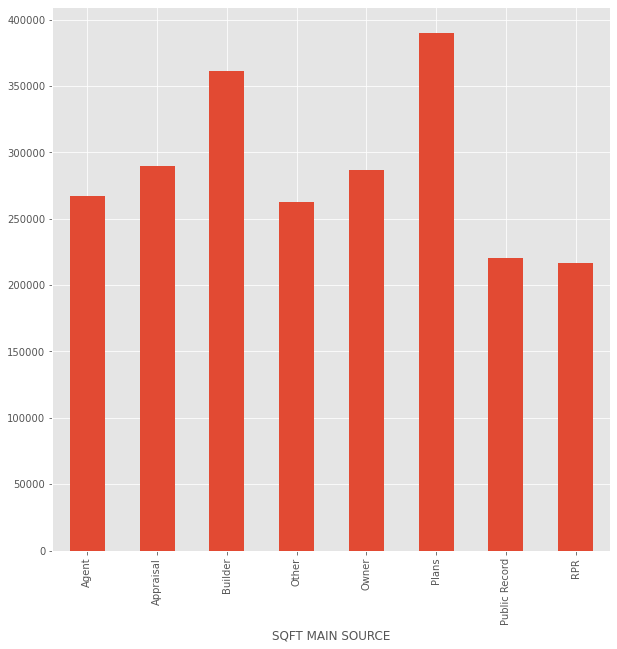

In [144]:
df2.groupby('SQFT MAIN SOURCE')['sale_price'].mean().plot.bar(figsize=(10,10))

In [145]:
df2['Below Grade Finished Sq Ft Source'].unique()

array(['Public Record', 'Appraisal', 'Other', 'Agent', 'RPR', nan,
       'Owner', 'Plans', 'Builder'], dtype=object)

In [159]:
df2['Below Grade Finished Sq Ft Source'] = df2['Below Grade Finished Sq Ft Source'].fillna(value='Other')

In [148]:
df2['Below Grade Finished Sq Ft Source'].value_counts()

Public Record    995
Other            257
Owner            207
Builder          199
Agent            178
Plans            122
RPR              105
Appraisal         60
Name: Below Grade Finished Sq Ft Source, dtype: int64

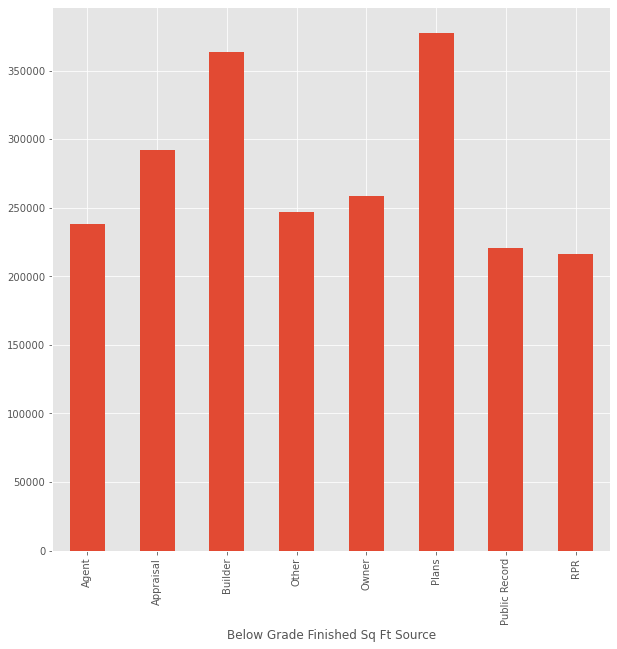

In [149]:
df2.groupby('Below Grade Finished Sq Ft Source')['sale_price'].mean().plot.bar(figsize=(10,10))

In [150]:
df2['City'].unique()

array(['Pleasant Hill', 'Strasburg', 'Archie', 'Garden City', 'Belton',
       'Cleveland', 'Harrisonville', 'Raymore', 'East Lynne', 'Peculiar',
       'Creighton', 'Drexel', 'Freeman', 'Lees Summit', 'Greenwood',
       'Kingsville', 'Lake Winnebago', 'Loch Lloyd'], dtype=object)

In [161]:
df2['Floor Plan Description'].unique()

array(['Ranch', '1.5 Stories', 'Bungalow', '2 Stories', 'Earth Contact',
       'Raised Ranch', 'Split Entry', 'Ranch, Reverse 1.5 Story',
       'Reverse 1.5 Story', '3 Stories'], dtype=object)

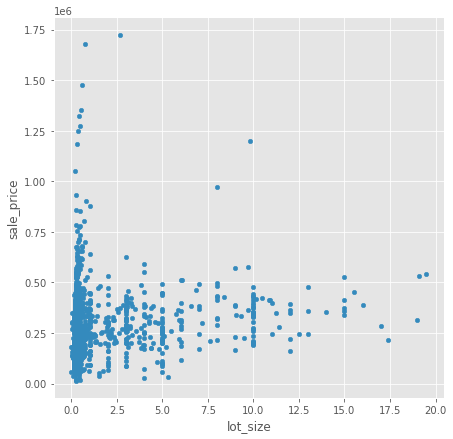

In [151]:
df2.plot.scatter(x='lot_size', y='sale_price', figsize=(7,7))

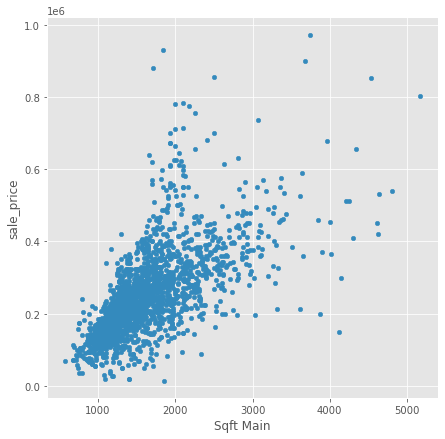

In [166]:
df3.plot.scatter(x='Sqft Main', y='sale_price', figsize=(7,7))

In [163]:
df3 = df2[df2['sale_price']>63000]

In [165]:
df3= df2[df2['sale_price']<1000000]

In [167]:
df3 = df2[df2['lot_size']<10.5]
df3 = df2[df2['Sqft Main']<6000]
df3 = df2[df2['Sqft Main']>500]

In [82]:
df2['lot_size2'] = df2['lot_size']*43560

array(['Single Family'], dtype=object)

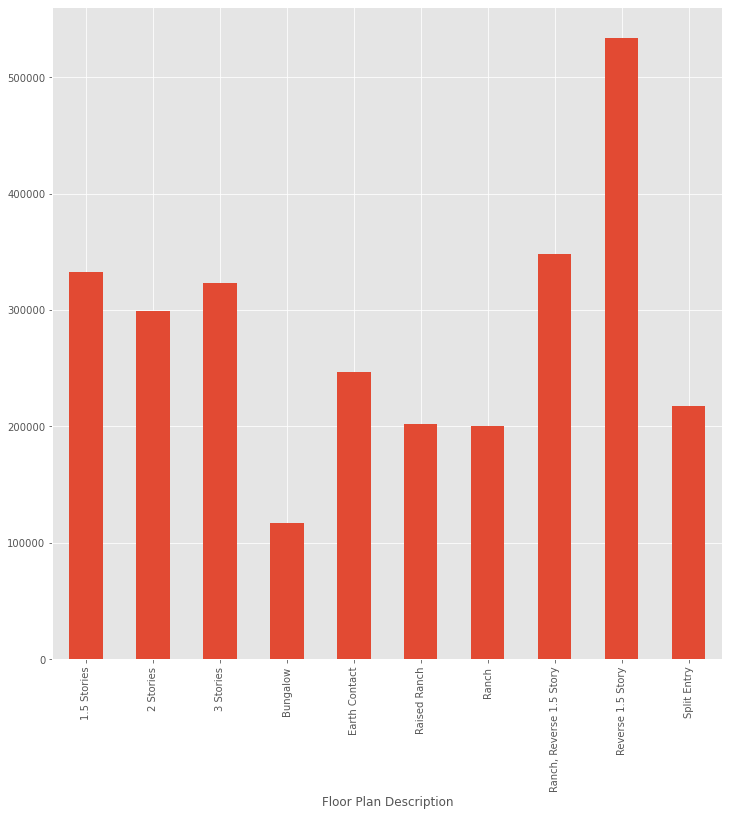

In [168]:
df3.groupby('Floor Plan Description')['sale_price'].mean().plot.bar(figsize=(12,12))

In [177]:
df3['Year Built'].unique()

array([1950, 1920, 1836, 1971, 1880, 1942, 1965, 1964, 1960, 1900, 1940,
       1990, 1974, 1976, 1910, 1991, 2006, 1983, 1870, 1955, 1890, 1906,
       1915, 1930, 1982, 1952, 1981, 1925, 1989, 1948, 1979, 1963, 2005,
       1945, 1957, 1951, 1994, 1968, 1978, 1973, 1980, 1883, 1954, 1935,
       1970, 1913, 1993, 1918, 2003, 2000, 1961, 1985, 1992, 1966, 1977,
       1962, 1953, 1959, 1905, 1958, 1987, 1998, 1899, 1972, 1984, 1986,
       1995, 1997, 1975, 2016, 1956, 2001, 1903, 2015, 1941, 2017, 1996,
       2019, 2020, 1947, 2002, 1988, 1999, 2007, 1967, 1933, 2004, 1969,
       2014, 2011, 2018, 2013, 1928, 2012, 2009, 1949, 2008, 1860, 2010,
       1909, 1898])

In [176]:
df3['Year Built'] = df3['Year Built'].replace({0:2006})
df3['Year Built'] = df3['Year Built'].replace({196:1968})
df3['Year Built'] = df3['Year Built'].replace({1194:1994})

In [178]:
df3 = df3.rename(columns={'School District':'school_district'})

# Create new DF only using the larger school districts

In [180]:

df4 = df3.loc[df3['school_district'].apply(lambda x: x in ['Raymore-Peculiar','Belton','Pleasant Hill',
                                          'Harrisonville','Sherwood','Lees Summit','Cass-Midway'])]

In [181]:
df4 = df4.rename(columns={'Floor Plan Description':'fp', 'school_district':'school', 'Street Maintenance':'street'})  

In [182]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2056 entries, 0 to 2122
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         2056 non-null   int64  
 1   address1                           2056 non-null   object 
 2   address2                           2056 non-null   object 
 3   MLS Number                         2056 non-null   int64  
 4   sale_price                         2056 non-null   int64  
 5   City                               2056 non-null   object 
 6   Sub Div                            2056 non-null   object 
 7   Type                               2056 non-null   object 
 8   fp                                 2056 non-null   object 
 9   Bdrms                              2056 non-null   int64  
 10  Baths Full                         2056 non-null   int64  
 11  Baths Half                         2056 non-null   int64

In [183]:
df5 = pd.get_dummies(data=df4, columns=['fp', 'City', 'school', 'street', 
                                        'SQFT MAIN SOURCE', 'Below Grade Finished Sq Ft Source' ], dtype='int64')

In [184]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2056 entries, 0 to 2122
Data columns (total 91 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Unnamed: 0                                       2056 non-null   int64  
 1   address1                                         2056 non-null   object 
 2   address2                                         2056 non-null   object 
 3   MLS Number                                       2056 non-null   int64  
 4   sale_price                                       2056 non-null   int64  
 5   Sub Div                                          2056 non-null   object 
 6   Type                                             2056 non-null   object 
 7   Bdrms                                            2056 non-null   int64  
 8   Baths Full                                       2056 non-null   int64  
 9   Baths Half                    

In [113]:
df4['In Floodplain'] = df4['In Floodplain'].fillna(value=0)

In [185]:
X = df5[['Bdrms', 'Baths Full', 'Baths Half', 'Year Built', 'Sqft Main', 'Below Grade Finished Sq Ft',
       'Fireplace?', 'Basement', 'Garage/Parking?','In Floodplain',
       'Inside City Limits', 'Central Air','lot_size', 'fp_1.5 Stories',
       'fp_2 Stories', 'fp_3 Stories', 'fp_Bungalow', 'fp_Earth Contact',
       'fp_Raised Ranch', 'fp_Ranch', 'fp_Ranch, Reverse 1.5 Story',
       'fp_Reverse 1.5 Story', 'fp_Split Entry', 'City_Belton',
       'City_Cleveland', 'City_Creighton', 'City_East Lynne', 'City_Freeman',
       'City_Garden City', 'City_Greenwood', 'City_Harrisonville',
       'City_Lake Winnebago', 'City_Lees Summit', 'City_Loch Lloyd',
       'City_Peculiar', 'City_Pleasant Hill', 'City_Raymore', 'City_Strasburg',
       'school_Belton', 'school_Cass-Midway', 'school_Harrisonville',
       'school_Lees Summit', 'school_Pleasant Hill', 'school_Raymore-Peculiar',
       'school_Sherwood', 'street_Gravel', 'street_Gravel, Paved',
       'street_Paved', 'street_Priv Maint', 'street_Priv Maint, Gravel',
       'street_Priv Maint, Paved', 'street_Pub Maint',
       'street_Pub Maint, Gravel', 'street_Pub Maint, Paved',
       'street_Pub Maint, Priv Maint', 'SQFT MAIN SOURCE_Agent',
       'SQFT MAIN SOURCE_Appraisal', 'SQFT MAIN SOURCE_Builder',
       'SQFT MAIN SOURCE_Other', 'SQFT MAIN SOURCE_Owner',
       'SQFT MAIN SOURCE_Plans', 'SQFT MAIN SOURCE_Public Record',
       'SQFT MAIN SOURCE_RPR', 'Below Grade Finished Sq Ft Source_Agent',
       'Below Grade Finished Sq Ft Source_Appraisal',
       'Below Grade Finished Sq Ft Source_Builder',
       'Below Grade Finished Sq Ft Source_Other',
       'Below Grade Finished Sq Ft Source_Owner',
       'Below Grade Finished Sq Ft Source_Plans',
       'Below Grade Finished Sq Ft Source_Public Record',
       'Below Grade Finished Sq Ft Source_RPR']]
y = np.log(df5['sale_price'])

In [109]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, Ridge, Lasso

In [186]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [187]:
linear_model = LinearRegression().fit(X_train, y_train)
linear_model.score(X_test, y_test)

0.799037487234898

In [188]:
ridgecv = RidgeCV()
ridgecv.fit(X_train, y_train)
ridgecv.score(X_test, y_test)

0.8155420640457088

In [189]:
ridge = Ridge()
ridge.fit(X_train, y_train)
ridge.score(X_test, y_test)

0.8155420536335305